**Exploratory Data Analysis (EDA)**
---

In [134]:
import math
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv('diamonds.csv', index_col=0)
pd.set_option('display.max_columns', None)
df.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [136]:
df.shape 
#gives the rows and columns of the dataset

(219703, 25)

In [137]:
#displaying all the columns of the diamond dataset
df.columns

Index(['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab',
       'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition',
       'depth_percent', 'table_percent', 'meas_length', 'meas_width',
       'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

In [138]:
df.dtypes

cut                             object
color                           object
clarity                         object
carat_weight                   float64
cut_quality                     object
lab                             object
symmetry                        object
polish                          object
eye_clean                       object
culet_size                      object
culet_condition                 object
depth_percent                  float64
table_percent                  float64
meas_length                    float64
meas_width                     float64
meas_depth                     float64
girdle_min                      object
girdle_max                      object
fluor_color                     object
fluor_intensity                 object
fancy_color_dominant_color      object
fancy_color_secondary_color     object
fancy_color_overtone            object
fancy_color_intensity           object
total_sales_price                int64
dtype: object

Now we will use the describe() function which provides basic statistics about the numeric columns in the DataFrame. It includes metrics like count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.

In [139]:
df.describe()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


In [140]:
def print_unique_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [141]:
print_unique_values(df)

cut: ['Round' 'Pear' 'Oval' 'Marquise' 'Princess' 'Emerald' 'Heart' 'Cushion'
 'Radiant' 'Cushion Modified' 'Asscher']
color: ['E' 'F' 'L' 'D' 'J' 'I' 'G' 'H' 'M' 'K' 'unknown']
clarity: ['VVS2' 'VVS1' 'I1' 'VS1' 'VS2' 'IF' 'SI2' 'I2' 'SI1' 'SI3' 'I3']
cut_quality: ['Excellent' 'Very Good' 'unknown' 'Good' 'Fair' 'Ideal']
lab: ['IGI' 'GIA' 'HRD']
symmetry: ['Very Good' 'Excellent' 'Good' 'Fair' 'Poor']
polish: ['Very Good' 'Excellent' 'Good' 'Fair' 'Poor']
eye_clean: ['unknown' 'Yes' 'E1' 'Borderline' 'No']
culet_size: ['N' 'unknown' 'S' 'M' 'VS' 'L' 'EL' 'SL' 'VL']
culet_condition: ['unknown' 'Abraded' 'Chipped' 'Pointed']
girdle_min: ['M' 'STK' 'TN' 'TK' 'unknown' 'VTN' 'VTK' 'XTK' 'XTN' 'STN']
girdle_max: ['M' 'STK' 'TK' 'unknown' 'TN' 'VTK' 'XTK' 'XTN' 'VTN' 'STN']
fluor_color: ['unknown' 'Blue' 'Yellow' 'Green' 'White' 'Orange']
fluor_intensity: ['None' 'Very Slight' 'Strong' 'Medium' 'Faint' 'Very Strong' 'unknown'
 'Slight']
fancy_color_dominant_color: ['unknown' 'Orange' 'Brown

In [142]:
categorical_columns = [col for col in df if df[col].dtype == 'object']
categorical_columns

['cut',
 'color',
 'clarity',
 'cut_quality',
 'lab',
 'symmetry',
 'polish',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

**BOX PLOTS**

Box Plot displays the five-number summary of a set of data with the help of a box and a few verticle lines.



*   Minimum: Q1-1.5*IQR
*   1st quartile (Q1): 25th percentile
*   Median:50th percentile
*   3rd quartile(Q3):75th percentile
*   Maximum: Q3+1.5*IQR

IQR - Inter Quartile Range (region between 1st quartile and 3rd quartile\). 50% of the total data lies in this region.

The box plot also allows to discover the outliers, the points beyond the vertical lines, i.e. the points lying in Minimum and Maximum regions.


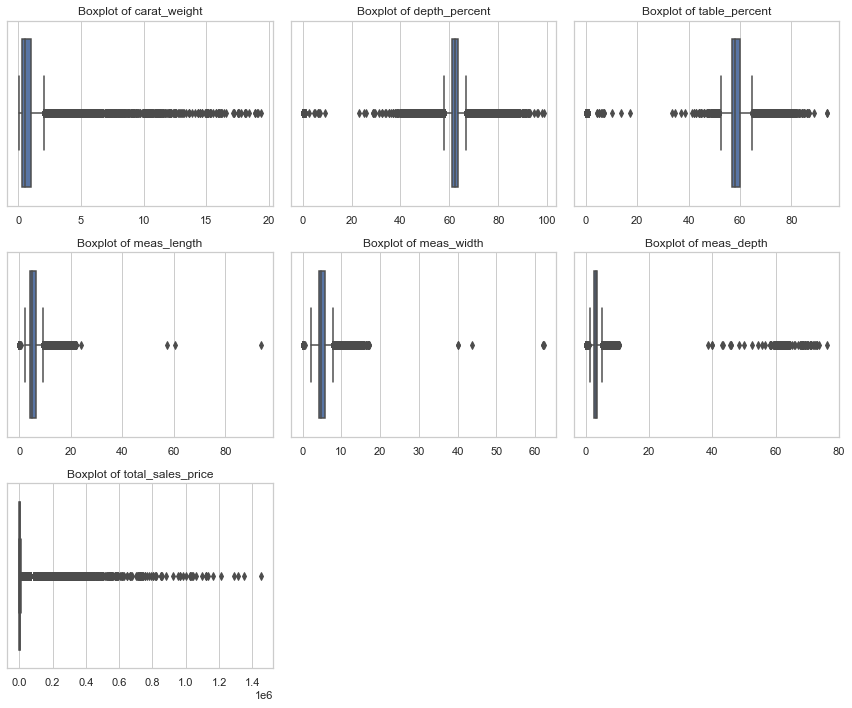

In [143]:
sns.set_theme(style="whitegrid")

# Creating a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Flattenning the axes array for easier iteration
axes = axes.flatten()

# List of numeric columns for creating boxplots
numeric_columns = ["carat_weight", "depth_percent", "table_percent",
                   "meas_length", "meas_width", "meas_depth",
                   "total_sales_price"]

# Creating boxplots for each numeric column
for ax, col in zip(axes, numeric_columns):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Removing the last 2 unused subplots
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

1st Plot: "carat_weight"

*   Carat Weight refers to the mass of the diamond. Here, it depicts that the carat weight is skewed and maximum values is concentrated between 0 to 2. There are lot of outliers points.


2nd Plot: "depth_percent"

*   Depth Percent is the relative measurements of the depth of the diamonds. This is partially symmetric data, and most of the values are concentrated in between 60 to 65 roughly. There are outlier points on both sides of the centralized data.



3rd Plot: "table_percent"


*   Table Percent is the relative measurements of the flat part of the top of the diamonds. This is partially symmetric data, and most of the values are concentrated in between 56 to 61 roughly. There are outlier points on both sides of the centralized data.


4th Plot: "meas_length"


*   The "meas _ength" for a diamond refers to the measured length of the diamond when viewed from the top. This is skewed data, where most of the values are concentrated in between 2 to 8 roughly. There are very few outlier points.

5th Plot: "meas_width"


*   The "meas_width" typically refers to the width of the diamond when viewed from the top. This is skewed data, where most of the values are concentrated in between 2 to 8 roughly. There are very few outlier points in this case too.

6th Plot: "meas_depth"


*   The "meas_depth" of a diamond is measured from the table (the flat top surface of the diamond) to the culet (the pointed bottom tip of the diamond). This is skewed data, where most of the values are concentrated in between 1 to 5 roughly. It have few outlier points.

7th Plot: "total_sales_price"


*   It tells about the final prices of the diamonds in dollars based on its physical characteristics. This is highly skewed data, where maximum values are concentrated around $10000 roughly. It has a high number of outlier points.

In [144]:
upper=[2.035,66.95,64.5,9.35,7.785,5.055,-5415.5]
lower=[-0.725,57.75,52.5,1.35,2.225,1.255,11580.5]

print('Outlier in percentage')
for i in range(7):
    count=0
    for val in df[numeric_columns[i]]:
        if val>upper[i] or val<lower[i]:
            count=count+1

    print(numeric_columns[i]+' : '+str(count/len(df[numeric_columns[i]])*100)+' %')

Outlier in percentage
carat_weight : 4.299895768378219 %
depth_percent : 15.840020391164437 %
table_percent : 12.162328234025024 %
meas_length : 4.49789033376877 %
meas_width : 5.214312048538254 %
meas_depth : 4.1487826747927885 %
total_sales_price : 100.0 %


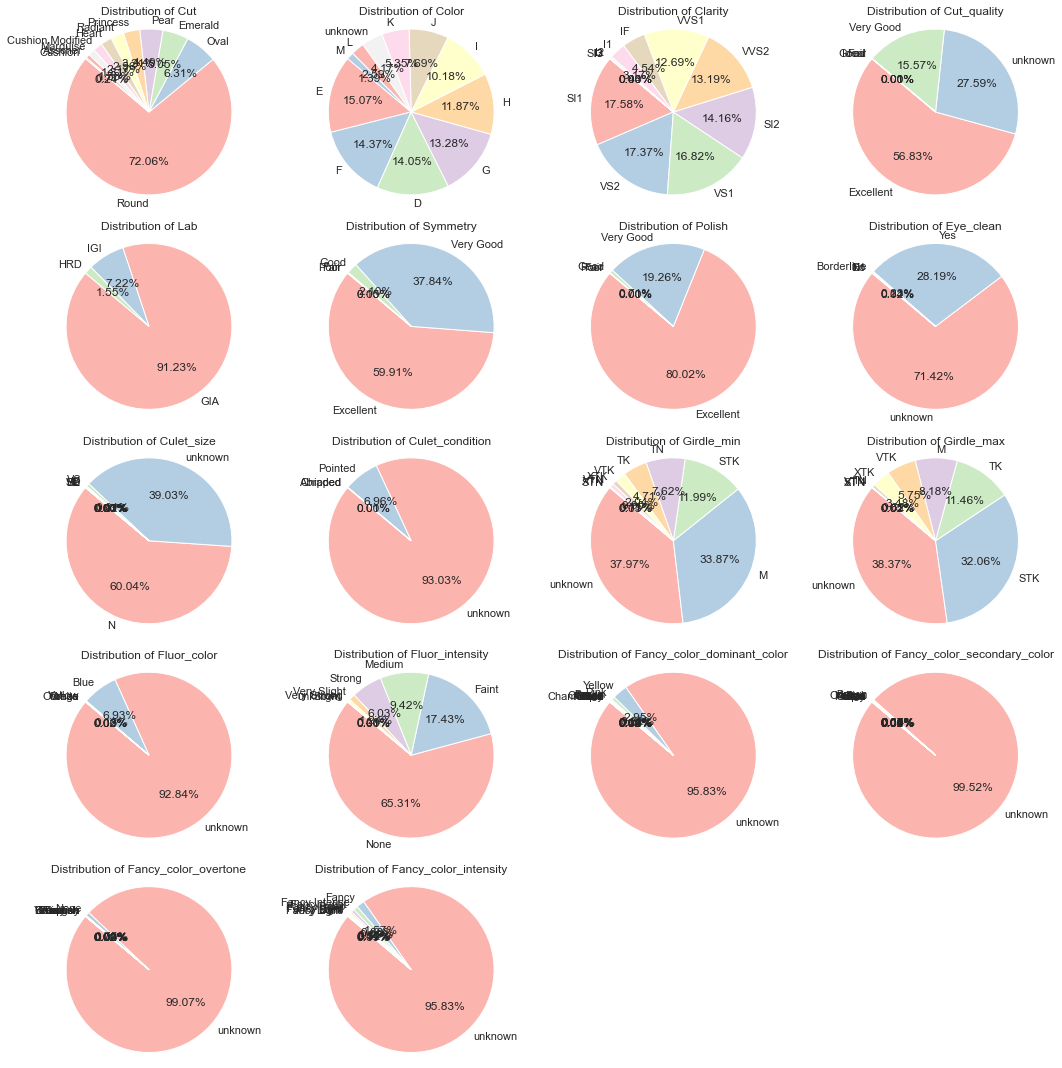

In [145]:
features = ["cut", 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition',
            'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 
            'fancy_color_overtone', 'fancy_color_intensity', ]

# Set up the grid of subplots
num_rows = 5  # Number of rows in the grid
num_cols =  4 # Number of columns in the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))


# Define a color palette using Seaborn's 'Pastel1' colormap
color_palette = sns.color_palette('Pastel1')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for idx, feature in enumerate(features):
    feature_counts = df[feature].value_counts()
    labels = feature_counts.index
    sizes = feature_counts.values
    colors = color_palette[:len(labels)]

    ax = axes[idx]  # Get the current subplot

    # Create the pie chart on the current subplot
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
    ax.set_title(f'Distribution of {feature.capitalize()}')
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

#not displaying the empty subplots
for i in range(len(features), num_rows * num_cols):
    axes[i].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

From the above analysis we can conclude that columns 
1) fluor_color
2) fancy_color_dominant_color
3) fancy_color_secondary_color
4) fancy_color_overtone
5) fancy_color_intensity
6) eye_clean
7) culet_condition

have very high proportion of unknown values.

Apart from that we can see that the columns like
1) lab
2) cut
3) symmetry

are significantly imbalabced.
The prevalence of specific values indicates a potential industry standard or common preference among customers.


Features like 'color', 'clarity', 'girdle_min' and 'girdle_max' show a more evenly distributed data.
 These features exhibit a more uniform distribution, indicating that there is no strong bias or preference toward specific values. The values are spread out across the available range.
 In the context of diamonds, 'color' and 'clarity' are often used to differentiate and classify diamonds into various quality grades. An even distribution suggests that diamonds with different colors or clarity grades are present in the dataset.

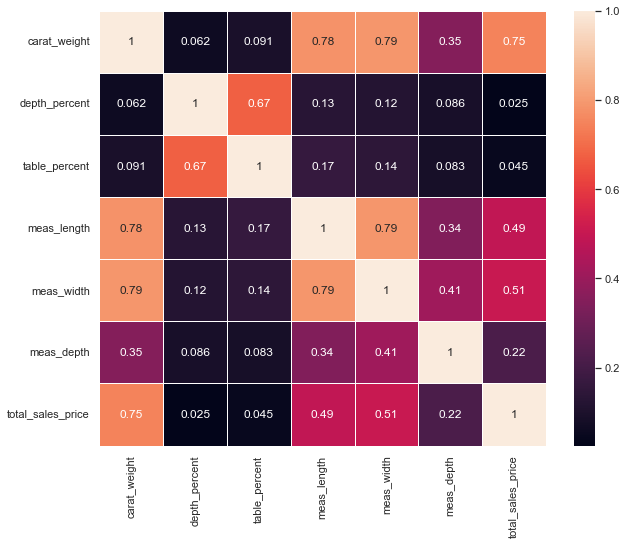

In [146]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=1)
plt.show()

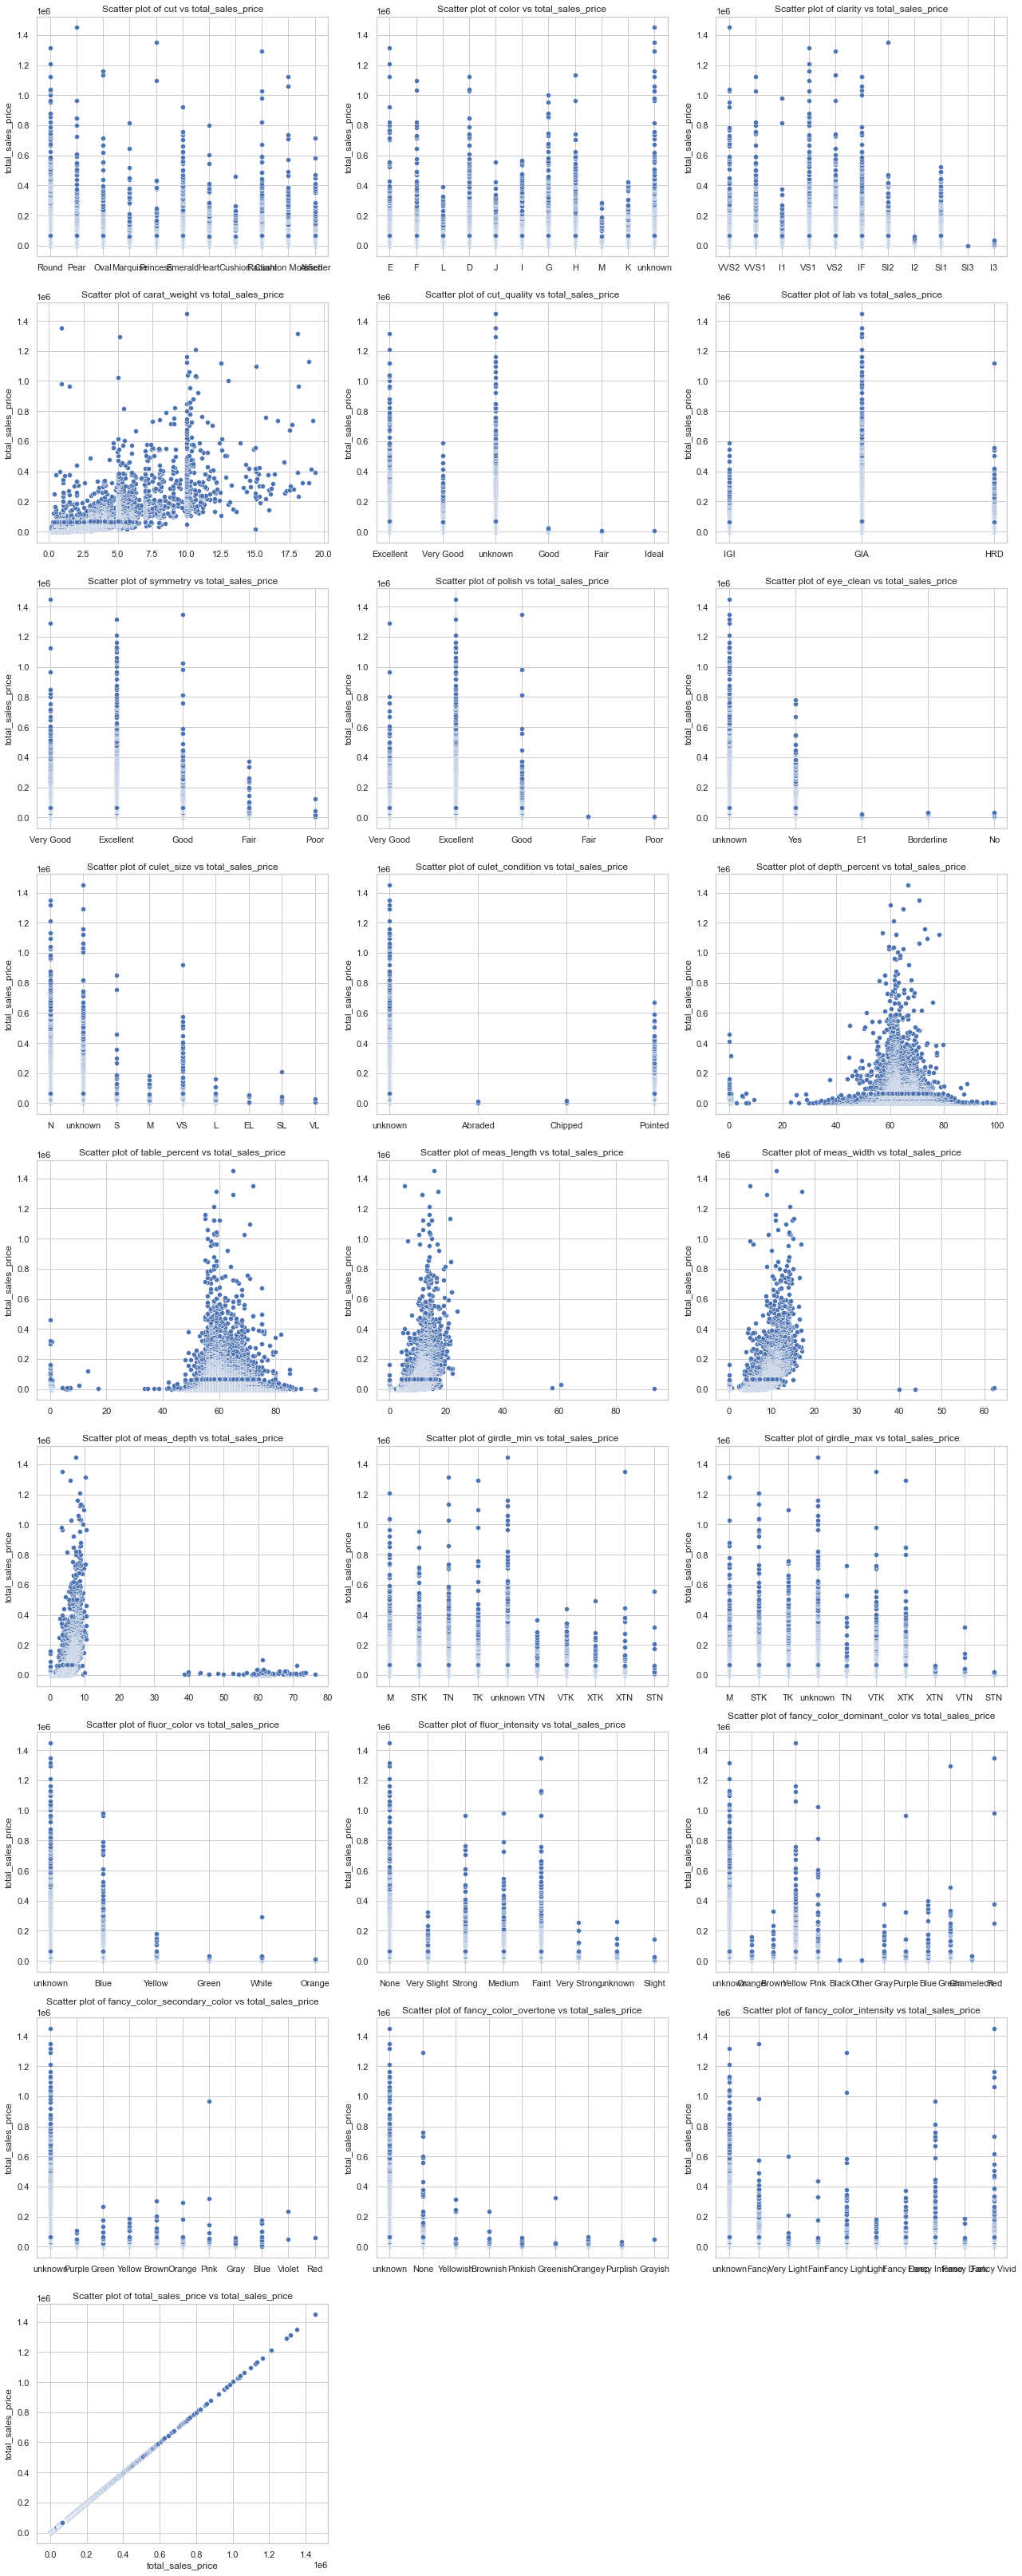

In [147]:
sns.set_theme(style="whitegrid")

# Plotting all the plots of every feature with respect to the total_sales_prie
y_column = "total_sales_price"

# List of columns/features to be plotted on the x-axis
x_columns = ["cut", "color", "clarity","carat_weight","cut_quality","lab","symmetry",
             "polish","eye_clean","culet_size","culet_condition","depth_percent","table_percent",
             "meas_length","meas_width","meas_depth","girdle_min","girdle_max","fluor_color",
             "fluor_intensity","fancy_color_dominant_color","fancy_color_secondary_color",
             "fancy_color_overtone","fancy_color_intensity","total_sales_price"]

# the total number of scatter plots
num_plots = len(x_columns)

# number of rows required to present 3 plots in each row
num_rows = (num_plots + 2) // 3  # Each row will have 3 plots

# Creating subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))

# Flattenning the axes array for easier iteration
axes = axes.flatten()

# Loop through the x columns and create scatter plots
for i, x_col in enumerate(x_columns):
    sns.scatterplot(x=df[x_col], y=df[y_column], ax=axes[i])
    axes[i].set_title(f'Scatter plot of {x_col} vs {y_column}')

    # Remove x-axis label from all but the last row
    if i < (num_rows - 1) * 3:
        axes[i].set_xlabel('')

# Remove last 2 unused subplots
for i in range(num_plots, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

This are the scatter plots of all the features with respect to the `total_sales_price`. All of these depicts how a particular feature varies with respect to the total price of the diamonds. The features includes numerical as well as categorical data.

We can observe from the plots that `cut`, `color` and `clarity` varies symmetrically with the total sales price and have very few outlier points which affects the total prices.

The `cut_quality` data is skewed with respect to total sale price. In the `lab` feature, we see that the diamond with the lab certificate of the GIA has higher sales price than the others. The `carat_weight` which is numerical in nature seems to be distributed with the sales price of the diamonds.

We can see that for better `polish` and `symmetry`, the sale price is also high which is an expected behviour.

Also, for a greater `meas_length`, `meas_depth` and `meas_width`, the sale price is more which is again expected as if the size of the diamond increase, the price will increase too.

Certain features like `culet_condition`, `eye_clean`, `fluor_color`, `fancy_color_dominant_color`, `fancy_color_secondary_color`, `fancy_color_overtone` and `fancy_color_intensity` have more data which is unknown and so we can't really comment about their relationship with the total sale price.

When looking at a diamond from the top, the girdle is the part of the stone that creates the outline. From the side, the girdle separates the pavilion, or bottom, from the crown, the set of facets around the top. The `girdle_min` and `girdle_max` seems to be distributed in the data.


A high correlation can be seen with `carat_weight`, `meas_length`, `meas_width`, `meas_depth` and `depth_percent`. So lets analyze it further:

<AxesSubplot: xlabel='carat_weight', ylabel='meas_length'>

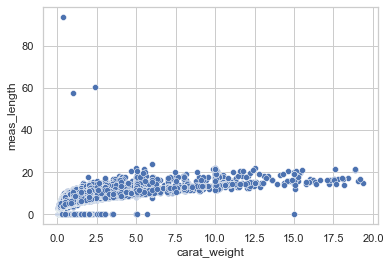

In [148]:
sns.scatterplot(x=df["carat_weight"], y=df["meas_length"])

<AxesSubplot: xlabel='carat_weight', ylabel='meas_depth'>

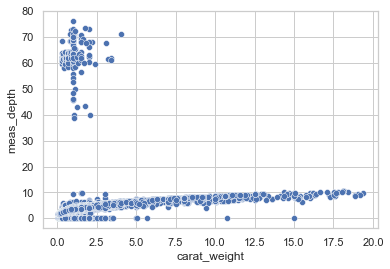

In [149]:
sns.scatterplot(x=df["carat_weight"], y=df["meas_depth"])

<AxesSubplot: xlabel='carat_weight', ylabel='meas_width'>

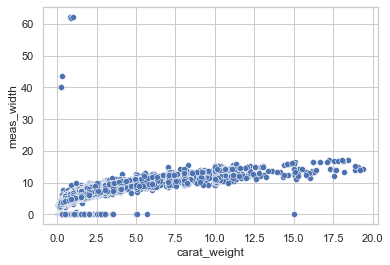

In [150]:
sns.scatterplot(x=df["carat_weight"], y=df["meas_width"])

<AxesSubplot: xlabel='meas_length', ylabel='meas_width'>

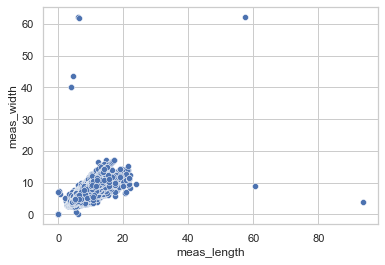

In [151]:
sns.scatterplot(x=df["meas_length"], y=df["meas_width"])

<AxesSubplot: xlabel='carat_weight', ylabel='total_sales_price'>

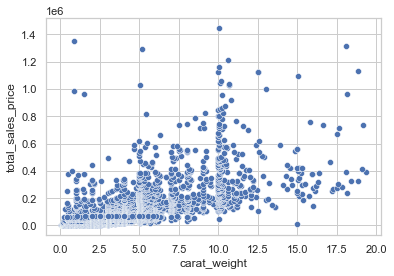

In [152]:
sns.scatterplot(x=df["carat_weight"], y=df["total_sales_price"])

From the above plots we can conclude that there is a heavy correlation between `carat_weight`, `meas_length`, `meas_width`, `meas_depth`.

The positive correlation between `carat_weight` and `meas_length`, `meas_width`, `meas_depth` is expected. Diamonds with larger dimensions tend to have higher carat weights. This is because carat weight is a measure of a diamond's mass, which is closely related to its physical size.




<AxesSubplot: xlabel='color', ylabel='total_sales_price'>

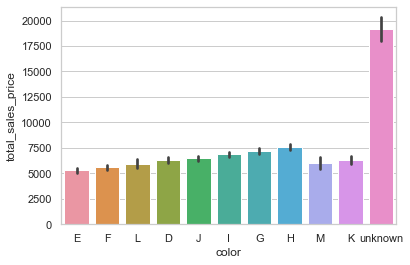

In [153]:
sns.barplot(x='color', y='total_sales_price', data=df)

We can conclude from the above plot that different colors have different price and some color are more valuable than others.

c:\Users\nancy\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nancy\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nancy\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

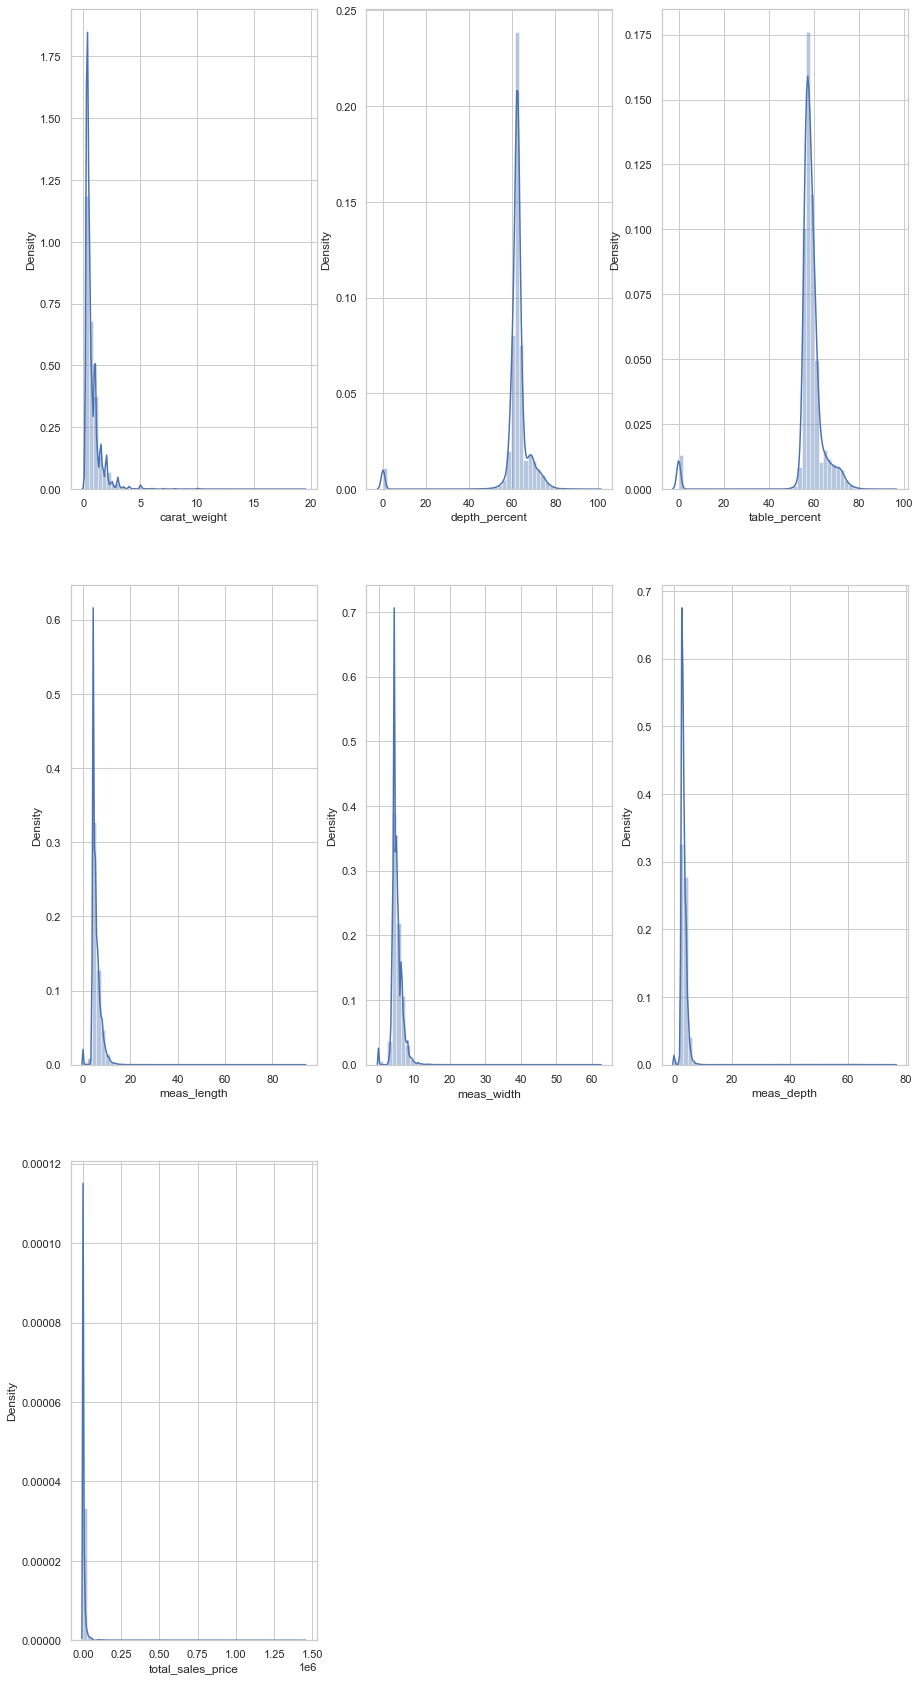

In [154]:
# Plotting histgram for each numerical columns to get a better idea about the distribution of the numeric data
fig, ax = plt.subplots(3, 3, figsize=(15, 30))
ax=ax.ravel()

for axid, col in enumerate(numeric_columns):
    sns.distplot(df[col], ax=ax[axid])
    plt.title=col

# Removing the last 2 unused subplots
for i in range(len(numeric_columns), len(ax)):
    fig.delaxes(ax[i])

In [155]:
print('Skewness for each numerical column')
for col in numeric_columns:
    print(col+' : '+str(df[col].skew()))

Skewness for each numerical column
carat_weight : 6.044751701764885
depth_percent : -5.133846209898752
table_percent : -4.53794997225588
meas_length : 2.295007701464152
meas_width : 2.269752732864105
meas_depth : 24.153614979342994
total_sales_price : 19.409830584608972


Columns
1) meas_depth
2) total_sales_price

seems to have highly right skewed data distribution.

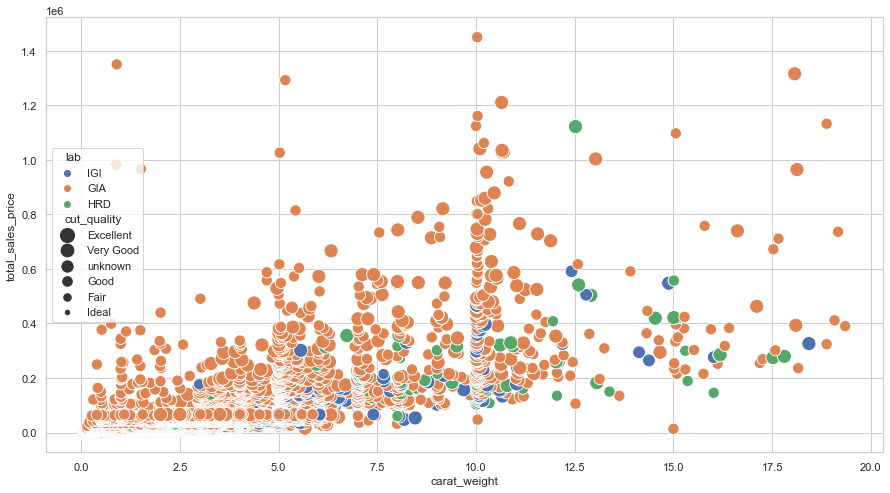

In [156]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["carat_weight"], y=df["total_sales_price"], hue=df["lab"], size=df["cut_quality"], sizes=(20, 200), legend="full")

From this plot, we can analyse that most of the diamonds have grading lab as 'GIA' certificate. Secondly, the cut quality of most of the diamonds is either Very Good, unknown or Execellent based on the sizes of the data points shown in the plot. 

Also, we can see that the total sales price is mostly within the range of 10,00,000 to 20,00,000 dollars. Also, the carat weight of the diamond is mostly within 0-2.5 g. 

We can see that there are certain verticle lines for example, carat weight 10 is very prominent hence showing that there is a larger reception in market for diamonds with carat weight 10.

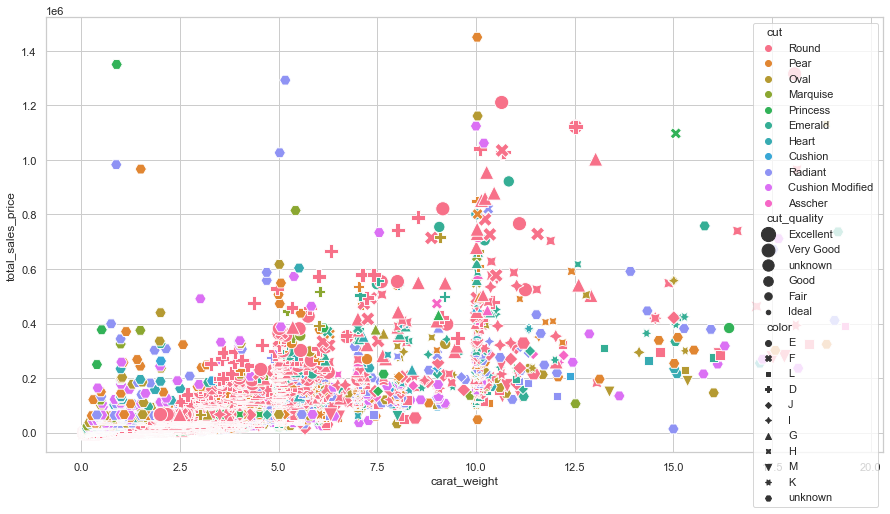

In [157]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["carat_weight"], y=df["total_sales_price"], hue=df["cut"], size=df["cut_quality"], style=df["color"], sizes=(20, 200), legend="full")

It can be observed that sales price increases with carat weight. Apart from that we can observe that only the cut quality does not determine the sales price, the color is equally important.

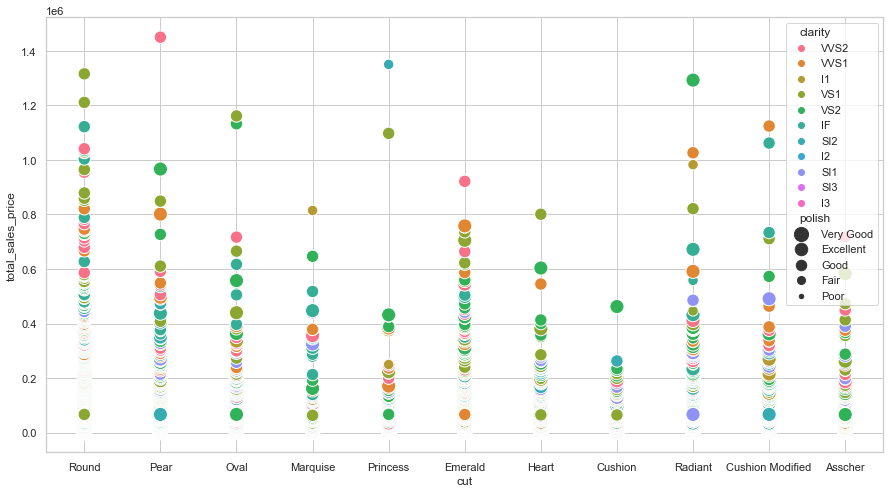

In [158]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["cut"], y=df["total_sales_price"], hue=df["clarity"], size=df["polish"], sizes=(20, 200), legend="full")

This plot is between `total_sales_price` and `cut` features of the diamond. The different colors or the hue represents the clarity feature of the diamond which seems to be evenly spreaded for all the clarity types. The size of the dots represents the polish nature of the diamond which seems to vary only between Very Good and Excellent types.

**Finding the Nulls in dataset**

Now we use the isnull() function to find the null values in the dataset.

In [159]:
df.isnull().sum()

cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64

We also find the number of 'unknown' values in each of the features.

In [160]:
for column in df.columns:
    nullvaluesindataset = (df[column] == "unknown").sum()
    print(f"{column} : {nullvaluesindataset}")

cut : 0
color : 9162
clarity : 0
carat_weight : 0
cut_quality : 60607
lab : 0
symmetry : 0
polish : 0
eye_clean : 156916
culet_size : 85740
culet_condition : 204384
depth_percent : 0
table_percent : 0
meas_length : 0
meas_width : 0
meas_depth : 0
girdle_min : 83432
girdle_max : 84295
fluor_color : 203977
fluor_intensity : 128
fancy_color_dominant_color : 210539
fancy_color_secondary_color : 218641
fancy_color_overtone : 217665
fancy_color_intensity : 210541
total_sales_price : 0


There are several columns where the value is UNKNOWN, hence that particular features doesn't affect or contribute in predicting the total sales price of the diamond.

**Preprocessing**
-----


We drop the features which have more than 60% values as 'unknown'. This is done because including features with a high percentage of 'unknown' values can bias the model. The model might learn to rely on these features too heavily, which can lead to inaccurate predictions or classifications.

In [161]:
drop_cols=[]
for cols in df.columns:
    # if df[cols].dtypes=='object':
    sum=(df[cols] == "unknown").sum()
    if sum/df.shape[0]>0.6:
        drop_cols.append(cols)

df_new=df.drop(drop_cols,axis='columns')
print(df.shape)
print(df_new.shape)

(219703, 25)
(219703, 18)


Now, the remaining features which have unknown values, for them we will replace the 'unknown' value with the mode of that feature. By replacing 'unknown' values with the most frequently occurring category, it can provide a reasonable estimate of the missing value.

In [162]:
for column in df_new.columns:
    nullvaluesindataset = (df_new[column] == "unknown").sum()
    print(f"{column} : {nullvaluesindataset}")

cut : 0
color : 9162
clarity : 0
carat_weight : 0
cut_quality : 60607
lab : 0
symmetry : 0
polish : 0
culet_size : 85740
depth_percent : 0
table_percent : 0
meas_length : 0
meas_width : 0
meas_depth : 0
girdle_min : 83432
girdle_max : 84295
fluor_intensity : 128
total_sales_price : 0


In [163]:
def replace_unknown_with_mode(dataframe, column_name, unknown_value):
    
    mode_value = dataframe[column_name].mode().iloc[0]
    dataframe[column_name] = dataframe[column_name].replace(unknown_value, mode_value)

In [164]:
fill_unknown=[]
for column in df_new.columns:
    nullvaluesindataset = (df_new[column] == "unknown").sum()
    if nullvaluesindataset>0:
        fill_unknown.append(column)
fill_unknown

['color',
 'cut_quality',
 'culet_size',
 'girdle_min',
 'girdle_max',
 'fluor_intensity']

In [165]:
for cols in fill_unknown:
    column_name_to_replace = cols
    unknown_value_to_replace = 'unknown'
    replace_unknown_with_mode(df_new, column_name_to_replace, unknown_value_to_replace)
df_new.shape

(219703, 18)

In [166]:
for column in df_new.columns:
    nullvaluesindataset = (df_new[column] == "unknown").sum()
    print(f"{column} : {nullvaluesindataset}")

cut : 0
color : 0
clarity : 0
carat_weight : 0
cut_quality : 0
lab : 0
symmetry : 0
polish : 0
culet_size : 0
depth_percent : 0
table_percent : 0
meas_length : 0
meas_width : 0
meas_depth : 0
girdle_min : 83432
girdle_max : 84295
fluor_intensity : 0
total_sales_price : 0


As it can be seen above that girdle_min and girdle_max still have 'unknown' values. This is because in case of these features, the 'unknown' values have the maximum frequency thereby the mode in this case is 'unknown' value itself. 

So, we will replace the 'unknown' values with the second most occuring value in girdle_min (which is 'M') and girdle_max (which is 'STK').

In [167]:
mode_value = 'M'
df_new['girdle_min'] = df_new['girdle_min'].replace("unknown", mode_value)

mode_value = 'STK'
df_new['girdle_max'] = df_new['girdle_max'].replace("unknown", mode_value)

In [168]:
for column in df_new.columns:
    nullvaluesindataset = (df_new[column] == "unknown").sum()
    print(f"{column} : {nullvaluesindataset}")

cut : 0
color : 0
clarity : 0
carat_weight : 0
cut_quality : 0
lab : 0


symmetry : 0
polish : 0
culet_size : 0
depth_percent : 0
table_percent : 0
meas_length : 0
meas_width : 0
meas_depth : 0
girdle_min : 0
girdle_max : 0
fluor_intensity : 0
total_sales_price : 0


Therefore, all the unknown values in the dataset have been replaced with the mode values of that particular feature.

In [169]:
df_new.shape

(219703, 18)

Now, we remove the outliers that we have seen above in the boxplots in order to reduce the biasness and the deviation in the data to train the model accurately.

In [170]:
def remove_outliers_iqr(dataframe, columns, lower_bound_factor=1.5, upper_bound_factor=1.5):
   
    trimmed_dataframe = dataframe.copy()
    
    for column in columns:
        # Calculate the IQR (Interquartile Range) for the column
        Q1 = trimmed_dataframe[column].quantile(0.25)
        Q3 = trimmed_dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - lower_bound_factor * IQR
        upper_bound = Q3 + upper_bound_factor * IQR

        # Filter the DataFrame to keep only the non-outliers
        trimmed_dataframe = trimmed_dataframe[(trimmed_dataframe[column] >= lower_bound) & (trimmed_dataframe[column] <= upper_bound)]

    return trimmed_dataframe

# Example usage:
# Assuming 'df' is your DataFrame and 'columns_to_remove_outliers' is a list of column names
columns_to_remove_outliers = ['meas_length', 'meas_depth', 'meas_width', "depth_percent", "carat_weight", "table_percent"]
df_new = remove_outliers_iqr(df_new, columns_to_remove_outliers)

In [171]:
df_new.shape

(152783, 18)

**Data Transformations**
---


We now try to convert the categorical data into the numeric data in the following few codes. This is done so as to make the dataset compatible with wider range of machine learning models (like linear regression). Also, performing mathematical operations becomes easier.  

In [172]:
df_new.columns

Index(['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab',
       'symmetry', 'polish', 'culet_size', 'depth_percent', 'table_percent',
       'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max',
       'fluor_intensity', 'total_sales_price'],
      dtype='object')

In [173]:
from sklearn import preprocessing

In [174]:
le = preprocessing.LabelEncoder()

In [175]:
categorical_columns = ['color', 'cut', 'lab', 'cut_quality', 'clarity', 'symmetry', 'polish', 'culet_size', 'girdle_min', 'girdle_max', 'fluor_intensity']
print(categorical_columns)


['color', 'cut', 'lab', 'cut_quality', 'clarity', 'symmetry', 'polish', 'culet_size', 'girdle_min', 'girdle_max', 'fluor_intensity']


In [176]:
# Create a dictionary to store the mapping
mapping = {}

# Apply LabelEncoder to each column
for column in categorical_columns:
    df_new[column] = le.fit_transform(df_new[column]) + 1 #to start the mapping from 1 
    mapping[column] = dict(zip(le.classes_, le.transform(le.classes_) + 1))


In [177]:
for column_name in categorical_columns:
    print(f'Mapping for column "{column_name}":')
    for key, value in mapping[column_name].items():
        print(f'{key}: {value}')
    print()


Mapping for column "color":
D: 1
E: 2
F: 3
G: 4
H: 5
I: 6
J: 7
K: 8
L: 9
M: 10

Mapping for column "cut":
Asscher: 1
Cushion: 2
Cushion Modified: 3
Emerald: 4
Heart: 5
Marquise: 6
Oval: 7
Pear: 8
Princess: 9
Radiant: 10
Round: 11

Mapping for column "lab":
GIA: 1
HRD: 2
IGI: 3

Mapping for column "cut_quality":
Excellent: 1
Fair: 2
Good: 3
Very Good: 4

Mapping for column "clarity":
I1: 1
I2: 2
I3: 3
IF: 4
SI1: 5
SI2: 6
VS1: 7
VS2: 8
VVS1: 9
VVS2: 10

Mapping for column "symmetry":
Excellent: 1
Fair: 2
Good: 3
Very Good: 4

Mapping for column "polish":
Excellent: 1
Fair: 2
Good: 3
Very Good: 4

Mapping for column "culet_size":
L: 1
M: 2
N: 3
S: 4
VS: 5

Mapping for column "girdle_min":
M: 1
STK: 2
STN: 3
TK: 4
TN: 5
VTK: 6
VTN: 7
XTK: 8
XTN: 9

Mapping for column "girdle_max":
M: 1
STK: 2
STN: 3
TK: 4
TN: 5
VTK: 6
VTN: 7
XTK: 8
XTN: 9

Mapping for column "fluor_intensity":
Faint: 1
Medium: 2
None: 3
Strong: 4
Very Slight: 5
Very Strong: 6



In [178]:
df_new.head(100)

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_intensity,total_sales_price
0,11,2,10,0.09,1,3,4,4,3,62.7,59.0,2.85,2.87,1.79,1,1,3,200
1,11,2,10,0.09,4,3,4,4,3,61.9,59.0,2.84,2.89,1.78,2,2,3,200
2,11,2,10,0.09,1,3,4,4,3,61.1,59.0,2.88,2.90,1.77,5,1,3,200
3,11,2,10,0.09,1,3,4,4,3,62.0,59.0,2.86,2.88,1.78,1,2,3,200
4,11,2,10,0.09,4,3,4,1,3,64.9,58.5,2.79,2.83,1.82,2,2,3,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,11,4,1,0.30,1,3,4,1,3,59.2,61.0,4.36,4.40,2.60,1,2,3,288
137,11,3,9,0.13,1,3,4,4,4,61.7,59.0,3.27,3.30,2.02,1,2,3,290
139,11,3,7,0.13,4,3,4,4,3,60.7,58.0,3.30,3.31,2.01,5,1,3,290
140,11,1,10,0.12,4,3,4,4,3,61.2,59.5,3.21,3.23,1.97,1,1,3,290


In [179]:
df_new.columns

Index(['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab',
       'symmetry', 'polish', 'culet_size', 'depth_percent', 'table_percent',
       'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max',
       'fluor_intensity', 'total_sales_price'],
      dtype='object')

**Model Training and Testing**
---

In [180]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV

In [181]:
df_new.shape

(152783, 18)

Now, we try to split the data randomly into a training set (80%) and a testing set (20%), with random_state=42 ensuring reproducibility, and shuffle=True randomizing the data before splitting.

In [182]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop(['total_sales_price'], axis='columns'), df_new["total_sales_price"], random_state=42, test_size=0.20, shuffle=True)

X_train and y_train: They hold the training features (excluding "total_sales_price") and corresponding target values, respectively.

X_test and y_test: They contain the testing features and their corresponding target values.

Now, we standardize the features in `X_train` using the `StandardScaler` to have zero mean and unit variance, then apply the same transformation to `X_test`. Finally, we display the shapes of the scaled training and testing datasets.

In [183]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((122226, 17), (30557, 17))

We will use various models like Linear Regression, Random Forest Regressor, XGB Regressor and Polynomial Regression to train and test our dataset and then find the best model among them.

In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor


The following code defines a dictionary called model_dict that contains information about three machine learning models:

1. Linear Regression 

2. Random Forest Regressor:

Hyperparameters: Varies n_estimators from 5 to 50 in steps of 5 and max_depth from 1 to 10 in steps of 2.

3. XGBoost Regressor:

Hyperparameters: Varies n_estimators from 10 to 800 in steps of 100 and learning_rate with three specified values (0.001, 0.01, and 0.1).

4. Polynomial Regression:

Hyperparameters: Varies degree from 2 to 10 in steps of 1.

In [186]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}},
    'PolynomialFeatures': {"model": make_pipeline(PolynomialFeatures(), LinearRegression()),
                      "params": {'polynomialfeatures__degree': [2,3]}}
}


This Python function, `eval_models()`, is used for evaluating and comparing multiple machine learning regression models with hyperparameter tuning. It initializes an empty DataFrame called `model_results` to store evaluation metrics and best hyperparameters for each model.

In [187]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 3746.368129586098 {}
RandomForestRegressor 3595.3125732689587 {'max_depth': 3, 'n_estimators': 30}
XGBRegressor 2779.048932535045 {'learning_rate': 0.1, 'n_estimators': 10}
PolynomialFeatures 3598.0289560235847 {'polynomialfeatures__degree': 2}
Best model:  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])


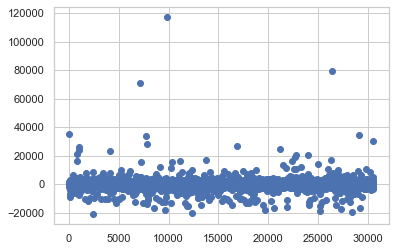

In [188]:
model_results = eval_models()

In [189]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,3746.36813,1616.847389,657.966357,645.310362,{}
RandomForestRegressor,3595.312573,1639.755485,612.343558,610.017494,"{'max_depth': 3, 'n_estimators': 30}"
XGBRegressor,2779.048933,1762.69334,716.915777,720.232415,"{'learning_rate': 0.1, 'n_estimators': 10}"
PolynomialFeatures,3598.028956,1516.157732,509.241858,504.840195,{'polynomialfeatures__degree': 2}


From the above table, we can conclude that `XGB Regressor` is the best model for this dataset because it has minimum error compared to the other models.